In [197]:
from importlib import reload
import qubic.job_manager_jpm as _jm
import chipcalibration.rabi_experiments as _rabi
import chipcalibration.ramsey_jpm as _ramsey
from matplotlib import pyplot as plt
from distproc.hwconfig import FPGAConfig, load_channel_configs
import chipcalibration.config as _cfg
import qubic.rpc_client as _rc
import numpy as np
import pygsti
from pygsti.models import modelconstruction as _mc

In [198]:
reload(_jm)
reload(_ramsey)

<module 'chipcalibration.ramsey_jpm' from '/home/jpmarceaux/chipcalibration/chipcalibration/ramsey_jpm.py'>

In [199]:
fpga_config = FPGAConfig(**{'fpga_clk_period': 2.e-9, 'alu_instr_clks': 5, 'jump_cond_clks': 5, 'jump_fproc_clks': 5,
                            'pulse_regwrite_clks': 3})

qchipname = 'X4Y2'
fpga_config, qchip, channel_config = _cfg.load_configs(qchipname, qchip_file='qubitcfg.json')



In [200]:
# setup a qubic jobmanager
runner = _rc.CircuitRunnerClient(ip='192.168.1.247')
jm = _jm.JobManager(fpga_config, channel_config, runner)

In [201]:
target_qid = 'Q2'
readout_register = ['Q1', 'Q2']
delay_interval = np.linspace(0,50.e-6,50)
initial_drive_frequency = qchip.qubits['Q2'].freq
print('Initial drive frequency:', initial_drive_frequency)

Initial drive frequency: 4944328462.654274


done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block

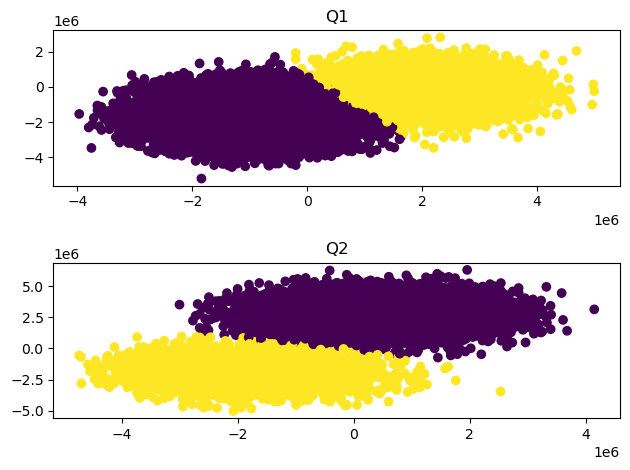

In [202]:
# collect classified shots with GMMRabi -- should really just be loading a GMM Manager
target_amplitude = qchip.qubits[target_qid].freq
pulse_width_interval = np.linspace(0, 100e-9, 10)
gmm_rabi = _rabi.GMMRabi(readout_register, target_amplitude, pulse_width_interval, 
                       channel_configs=channel_config)
gmm_rabi.run_and_report(jm, 1000, qchip)

In [213]:
reload(_ramsey)

<module 'chipcalibration.ramsey_jpm' from '/home/jpmarceaux/chipcalibration/chipcalibration/ramsey_jpm.py'>

In [223]:
# make a new job manager with the GMM manager
gmm_manager = gmm_rabi.gmm_manager
jm = _jm.JobManager(fpga_config, channel_config, runner, gmm_manager)

In [225]:
iramsey = _ramsey.RamseyExperiment([target_qid], readout_register, delay_interval, qchip.qubits[target_qid].freq)

done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block

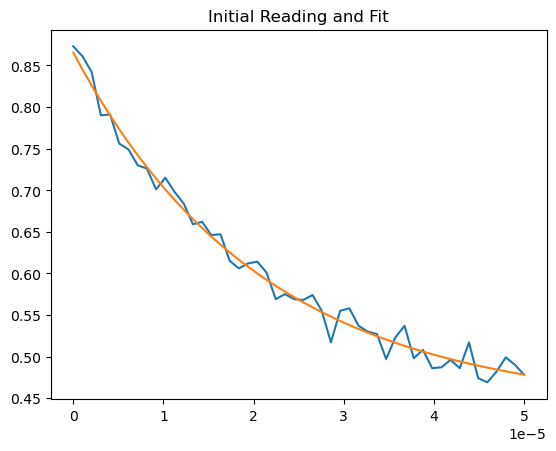

<Figure size 640x480 with 0 Axes>

done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block

{} could not be fit
{} could not be fit


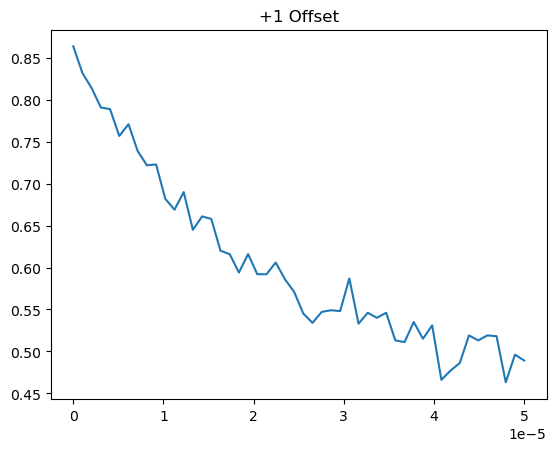

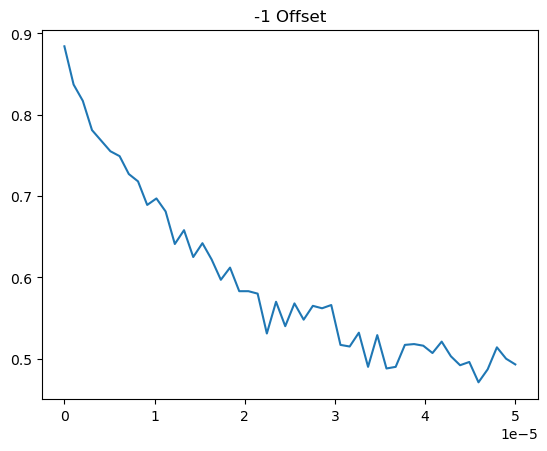

<Figure size 640x480 with 0 Axes>

In [ ]:
num_shots_per_circuit=1000
iramsey.run_and_report(jm, num_shots_per_circuit, qchip)

In [221]:
iramsey.update_qchip(qchip)

In [222]:
qchip.qubits['Q2'].freq

4944266666.840957